In [1]:
from pychomp import *
from pychomp.Braids import *

In [2]:
#Parameters settings for [1]
#m = 8, 18, 38, 58, 78, 98 (account for two constant strands)
#d = 4

In [3]:
m, d = 8, 4

In [4]:
def torus_knot ( m, d ):
    diagram = []
    for i in range(m):
        strand = []
        for j in range(d+1):
            if i-j < 0:
                strand . append ( m+(i-j) )
            else:
                strand . append ( i-j )
        diagram . append ( strand )
    return diagram

In [5]:
braid_diagram = BraidDiagram(torus_knot(m,d))

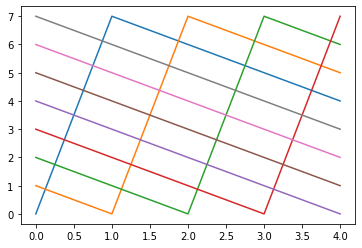

Braid Diagram

In [6]:
braid_diagram

In [7]:
braid_complex, braid_graph = BraidComplex(braid_diagram)

In [8]:
(poset, graded_complex) = FlowGradedComplex(braid_complex, braid_graph)

Compute Conley complex and connection matrix

In [9]:
%%time
cm = ConnectionMatrix(graded_complex)

CPU times: user 149 ms, sys: 826 µs, total: 150 ms
Wall time: 150 ms


Timing for initial Morse complex

In [ ]:
timingMGC = %timeit -o MorseGradedComplex(graded_complex)

Timing for Conley complex/connection matrix

In [10]:
timingCM = %timeit -o ConnectionMatrix(graded_complex)

151 ms ± 3.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Visualize Conley complex through *Conley-Morse graph* (see [2]):
 - Each node of poset with nontrivial Betti number of fiber is annotated with the Betti numbers

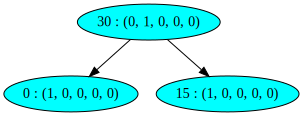

In [11]:
reduced_poset = Poset(InducedSubgraph(TransitiveClosure(poset), lambda v : v in cm.count()))
DrawGradedComplex(cm, reduced_poset)

[1] Harker, S., Mischaikow, K. & Spendlove, K. Morse theoretic templates for high dimensional homology computation.  arXiv  preprint arXiv:2105.09870, 2021. https://arxiv.org/abs/2105.09870.

[2] Harker, S., Mischaikow, K. & Spendlove, K. A computational framework for connection matrix theory. J Appl. and Comput. Topology (2021). https://doi.org/10.1007/s41468-021-00073-3